In [1]:
import dask.dataframe as dd
import pandas as pd


In [2]:
data = dd.read_csv(r'C:\Users\User\juypter\files\loan.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
npartitions=1,,,,,,,,,,,,,
,string,string,string,string,string,string,int64,int64,float64,int64,int64,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
data2 = pd.read_csv(r'C:\Users\User\juypter\files\loan.csv')
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
# Convert to Dask DataFrame
ddf = dd.from_pandas(data2, npartitions=1)

# Fill NaNs with mean using Dask methods
 # ddf = ddf.fillna(ddf.mean(axis=0))  # Fill with column-wise mean
# or
ddf = ddf.fillna(ddf.mean(axis=1))  # Fill with row-wise mean

# Further operations on ddf

ValueError: Metadata inference failed in `mean`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
TypeError('can only concatenate str (not "int") to str')

Traceback:
---------
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\utils.py", line 195, in raise_on_meta_error
    yield
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask_expr\_expr.py", line 3988, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\utils.py", line 1241, in __call__
    return getattr(__obj, self.method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\frame.py", line 11666, in mean
    result = super().mean(axis, skipna, numeric_only, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 12413, in mean
    return self._stat_function(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 12370, in _stat_function
    return self._reduce(
           ^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\frame.py", line 11535, in _reduce
    res = df._mgr.reduce(blk_func)
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\managers.py", line 1501, in reduce
    nbs = blk.reduce(func)
          ^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\blocks.py", line 404, in reduce
    result = func(self.values)
             ^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\frame.py", line 11454, in blk_func
    return op(values, axis=axis, skipna=skipna, **kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py", line 147, in f
    result = alt(values, axis=axis, skipna=skipna, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py", line 404, in new_func
    result = func(values, axis=axis, skipna=skipna, mask=mask, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py", line 719, in nanmean
    the_sum = values.sum(axis, dtype=dtype_sum)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py", line 49, in _sum
    return umr_sum(a, axis, dtype, out, keepdims, initial, where)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [12]:
print(ddf.compute())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
ddf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
ddf.npartitions

1

In [19]:
ddf.groupby('type').agg({'duration': ['mean', 'min', 'max', 'count']}):compute()

SyntaxError: illegal target for annotation (2295291260.py, line 1)

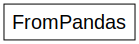

In [20]:
ddf.visualize()